## Lib import

In [1]:
import pandas as pd
from sklearn import decomposition
import numpy as np

## Exploring features

In [2]:
features_df = pd.read_csv("HAPT Data Set/features.txt")
features_df.head()
#features_df.describe()

,tBodyAcc-Mean-1
0,tBodyAcc-Mean-2
1,tBodyAcc-Mean-3
2,tBodyAcc-STD-1
3,tBodyAcc-STD-2
4,tBodyAcc-STD-3


## Loading data

In [3]:
print ('Loading data...')
X_tr = np.loadtxt('HAPT Data Set/Train/X_train.txt', delimiter=' ')
Y_tr = np.loadtxt('HAPT Data Set/Train/y_train.txt')
train_size = int(X_tr.shape[0]*0.8)
X_train = X_tr[0:train_size]
Y_train = Y_tr[0:train_size]
X_val = X_tr[train_size:]
Y_val = Y_tr[train_size:]

X_test = np.loadtxt('HAPT Data Set/Test/X_test.txt', delimiter=' ')
y_test = np.loadtxt('HAPT Data Set/Test/y_test.txt')
print ('Done!')

Loading data...
Done!


In [4]:
X_tr.shape

(7767, 561)

In [5]:
X_train.shape

(6213, 561)

In [6]:
X_val.shape

(1554, 561)

In [7]:
X_test.shape

(3162, 561)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting classifier to the Training set

In [9]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)

## Confusion Matrix

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9228336495888678

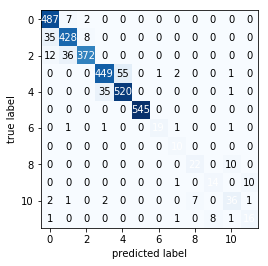

In [26]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

## Applying k-Fold Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()
accuracies.std()

0.04121020095155849